| **Inicio** | **atrás 5** |
|----------- |-------------- |
| [🏠](../README.md) | [⏪](./5_Optimizacion.ipynb)|

# **6. Métodos Numéricos**

## **Métodos de Solución de Ecuaciones No Lineales**

### **Métodos de bisección y Newton-Raphson**

**Método de Bisección:**

El método de bisección es un algoritmo de búsqueda de raíces que opera en intervalos cerrados y utiliza el principio de los intervalos intermedios. Supongamos que tenemos una función continua $f(x)$ en un intervalo $[a, b]$ tal que $( f(a) \cdot f(b) < 0 )$ (es decir, la función tiene valores opuestos en los extremos del intervalo). Entonces, el método de bisección divide iterativamente el intervalo por la mitad y selecciona el subintervalo donde la raíz se encuentra, hasta alcanzar una precisión deseada.

**Fórmulas:**

Dado un intervalo $[a, b]$ y un punto medio $(c = \frac{a + b}{2})$, el método de bisección actualiza el intervalo de la siguiente manera:

$\text{Si } f(a) \cdot f(c) < 0, \text{ entonces el nuevo intervalo es } [a, c]$

$\text{Si } f(b) \cdot f(c) < 0, \text{ entonces el nuevo intervalo es } [c, b]$

El proceso se repite hasta que se alcanza una tolerancia o un número máximo de iteraciones.

**Ejemplo con Gráfico en Python:**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**3 - 6*x**2 + 11*x - 6

def bisection_method(a, b, tol, max_iter):
    iterations = 0
    while (b - a) / 2 > tol and iterations < max_iter:
        c = (a + b) / 2
        if f(c) == 0:
            break
        elif f(a) * f(c) < 0:
            b = c
        else:
            a = c
        iterations += 1
    return c, iterations


Vamos a completar el ejemplo del método de bisección con gráficos en Python:

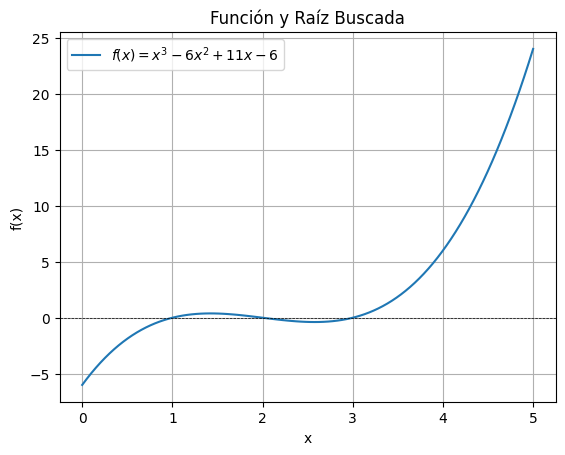

Raíz encontrada: 3.000011444091797
Iteraciones realizadas: 18


In [3]:
# Graficar la función
x_values = np.linspace(0, 5, 100)
y_values = f(x_values)

plt.plot(x_values, y_values, label='$f(x) = x^3 - 6x^2 + 11x - 6$')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Función y Raíz Buscada')
plt.legend()
plt.grid(True)
plt.show()

# Aplicar el método de bisección en el intervalo [0, 5]
a, b = 0, 5
tolerance = 1e-5
max_iterations = 100

root, iterations = bisection_method(a, b, tolerance, max_iterations)

# Imprimir resultados
print(f'Raíz encontrada: {root}')
print(f'Iteraciones realizadas: {iterations}')

En este ejemplo, la función $f(x) = x^3 - 6x^2 + 11x - 6$ tiene una raíz en el intervalo $[0, 5]$. El método de bisección se aplica para encontrar esta raíz, y los resultados se imprimen. También se muestra la gráfica de la función para visualizar la posición de la raíz.

**Método de Newton-Raphson:**

El método de Newton-Raphson es otro algoritmo para encontrar raíces de una función. Dado un punto inicial $(x_0)$, el método utiliza la tangente a la curva en ese punto para encontrar una mejor aproximación de la raíz. La iteración se realiza con la fórmula:

$x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$

Donde $f'(x_n)$ es la derivada de $f(x)$ evaluada en $(x_n)$.

**Ejemplo con Gráfico en Python:**

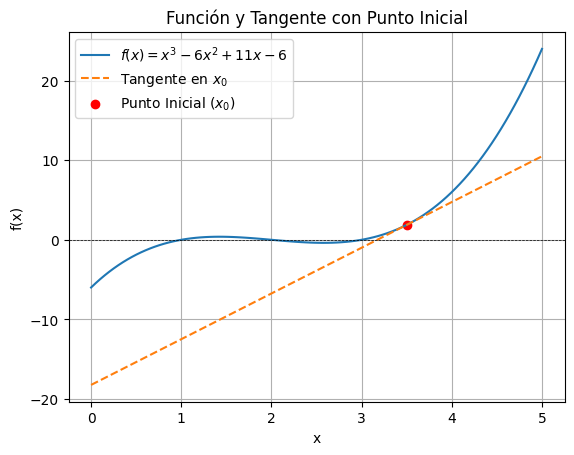

Raíz encontrada con Newton-Raphson: 3.000003168936892
Iteraciones realizadas con Newton-Raphson: 4


In [7]:
def f_prime(x):
    return 3*x**2 - 12*x + 11

def newton_raphson_method(x_0, tol, max_iter):
    iterations = 0
    while abs(f(x_0)) > tol and iterations < max_iter:
        x_0 = x_0 - f(x_0) / f_prime(x_0)
        iterations += 1
    return x_0, iterations

# Graficar la función y la tangente en un punto inicial
x_0 = 3.5
tangent_line = f_prime(x_0) * (x_values - x_0) + f(x_0)

plt.plot(x_values, y_values, label='$f(x) = x^3 - 6x^2 + 11x - 6$')
plt.plot(x_values, tangent_line, label='Tangente en $x_0$', linestyle='--')
plt.scatter(x_0, f(x_0), color='red', label='Punto Inicial $(x_0)$')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Función y Tangente con Punto Inicial')
plt.legend()
plt.grid(True)
plt.show()

# Aplicar el método de Newton-Raphson con el punto inicial x_0
root_newton, iterations_newton = newton_raphson_method(x_0, tolerance, max_iterations)

# Imprimir resultados
print(f'Raíz encontrada con Newton-Raphson: {root_newton}')
print(f'Iteraciones realizadas con Newton-Raphson: {iterations_newton}')

En este ejemplo, se muestra la función $f(x)$ junto con la tangente en un punto inicial $(x_0)$. Luego, se aplica el método de Newton-Raphson para encontrar la raíz.

## **Métodos de Integración Numérica**

### **Reglas del trapecio, Simpson**

**Regla del Trapecio:**

La regla del trapecio es una técnica de integración numérica que aproxima el valor de una integral definida dividiendo el área bajo la curva en múltiples trapecios. La fórmula para la regla del trapecio es:

$\int_{a}^{b} f(x) \,dx \approx \frac{h}{2} \left[ f(a) + 2f(x_1) + 2f(x_2) + \ldots + 2f(x_{n-1}) + f(b) \right]$

Donde $(h)$ es la longitud de cada subintervalo, $(a)$ y $(b)$ son los límites de integración, y $(x_1, x_2, \ldots, x_{n-1})$ son los puntos dentro de cada subintervalo.

**Ejemplo con Gráfico en Python:**

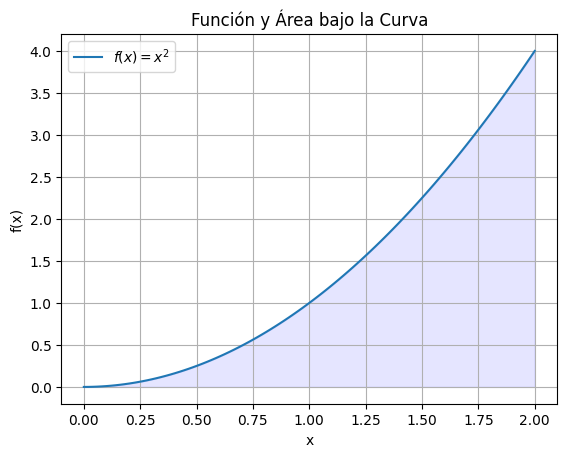

Área bajo la curva (Regla del Trapecio): 2.75


In [9]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**2

def trapezoidal_rule(a, b, n):
    h = (b - a) / n
    x_values = np.linspace(a, b, n + 1)
    y_values = f(x_values)
    return h * (np.sum(y_values) - 0.5 * (y_values[0] + y_values[-1]))

# Graficar la función
x_values = np.linspace(0, 2, 100)
y_values = f(x_values)

plt.plot(x_values, y_values, label='$f(x) = x^2$')
plt.fill_between(x_values, y_values, alpha=0.1, color='blue')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Función y Área bajo la Curva')
plt.legend()
plt.grid(True)
plt.show()

# Aplicar la regla del trapecio
a, b = 0, 2
n = 4  # Número de subintervalos
area_trapezoidal = trapezoidal_rule(a, b, n)

# Imprimir resultado
print(f'Área bajo la curva (Regla del Trapecio): {area_trapezoidal}')

Este código utiliza la regla del trapecio para aproximar el área bajo la curva de la función $f(x) = x^2$ en el intervalo $[0, 2]$. La gráfica muestra la función y el área aproximada en azul.

**Regla de Simpson:**

La regla de Simpson es otra técnica de integración numérica que utiliza polinomios de segundo grado (parábolas) para aproximar el valor de la integral definida. La fórmula para la regla de Simpson es:

$\int_{a}^{b} f(x) \,dx \approx \frac{h}{3} \left[ f(a) + 4f(x_1) + 2f(x_2) + \ldots + 2f(x_{n-2}) + 4f(x_{n-1}) + f(b) \right]$

donde $(h)$ es la longitud de cada subintervalo, $(a)$ y $(b)$ son los límites de integración, y $(x_1, x_2, \ldots, x_{n-1})$ son los puntos dentro de cada subintervalo.

**Ejemplo con Gráfico en Python:**

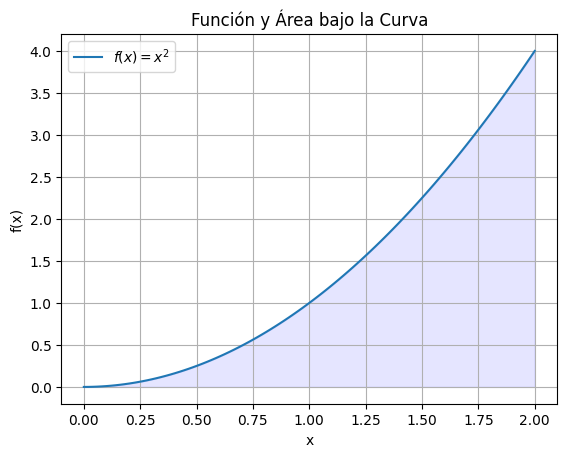

Área bajo la curva (Regla de Simpson): 2.6666666666666665


In [11]:
def simpson_rule(a, b, n):
    h = (b - a) / n
    x_values = np.linspace(a, b, n + 1)
    y_values = f(x_values)
    return h / 3 * np.sum(y_values[0:-1:2] + 4*y_values[1::2] + y_values[2::2])

# Graficar la función
plt.plot(x_values, y_values, label='$f(x) = x^2$')
plt.fill_between(x_values, y_values, alpha=0.1, color='blue')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Función y Área bajo la Curva')
plt.legend()
plt.grid(True)
plt.show()

# Aplicar la regla de Simpson
area_simpson = simpson_rule(a, b, n)

# Imprimir resultado
print(f'Área bajo la curva (Regla de Simpson): {area_simpson}')

Este código utiliza la regla de Simpson para aproximar el área bajo la curva de la función $f(x) = x^2$ en el intervalo $[0, 2]$. La gráfica muestra la función y el área aproximada en azul. Ambos métodos (trapecio y Simpson) son utilizados comúnmente para realizar integración numérica cuando la función no tiene una forma analítica fácil de integrar.

### **Métodos de Monte Carlo**

El método de Monte Carlo es una técnica estadística y computacional que utiliza números aleatorios para obtener resultados numéricos. Es particularmente útil para aproximar soluciones a problemas matemáticos complejos y realizar integración numérica. La idea básica es usar la aleatoriedad para simular el comportamiento de un sistema y obtener estadísticas a partir de múltiples simulaciones.

**Aplicación a la Aproximación de Áreas:**

Una aplicación común del método de Monte Carlo es la aproximación del área de una región. Supongamos que queremos encontrar el área de una región $(D)$ en un plano. Podemos inscribir esta región en un rectángulo más grande $(R)$ y generar puntos aleatorios uniformemente distribuidos en $(R)$. Luego, calculamos la fracción de puntos que caen dentro de la región $(D)$ y la multiplicamos por el área total de $(R)$ para obtener una aproximación del área de $(D)$.

**Fórmula:**

$\text{Área}(D) \approx \frac{\text{Número de puntos en } D}{\text{Número total de puntos en } R} \times \text{Área}(R)$

**Ejemplo con Gráfico en Python:**

Supongamos que queremos aproximar el área del círculo unitario $(D)$ inscrito en un cuadrado $(R)$ de lado 2. El área del círculo unitario es $(\pi)$, y el área del cuadrado es $(4)$. La relación de áreas es $(\frac{\pi}{4})$.

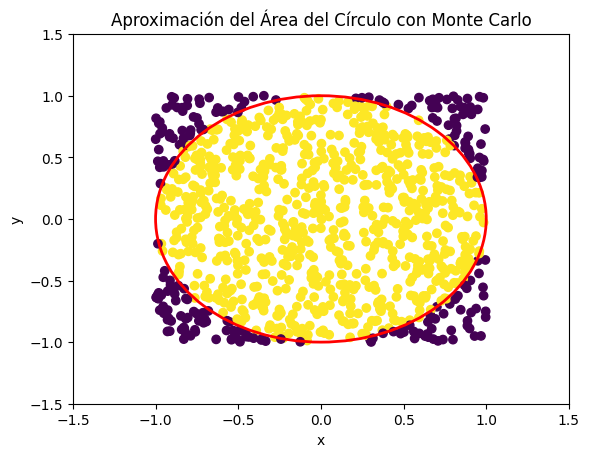

Área aproximada del círculo: 3.056


In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Número total de puntos generados
num_points = 1000

# Generar puntos aleatorios en el cuadrado [-1, 1] x [-1, 1]
points = np.random.rand(num_points, 2) * 2 - 1

# Calcular la distancia desde el origen para cada punto
distances = np.linalg.norm(points, axis=1)

# Verificar si cada punto está dentro del círculo unitario
points_inside_circle = distances <= 1

# Graficar puntos dentro y fuera del círculo
plt.scatter(points[:, 0], points[:, 1], c=points_inside_circle, cmap='viridis')
circle = plt.Circle((0, 0), 1, edgecolor='red', facecolor='none', linewidth=2)
plt.gca().add_patch(circle)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.title('Aproximación del Área del Círculo con Monte Carlo')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Calcular el área aproximada del círculo
area_ratio = np.sum(points_inside_circle) / num_points
approximated_area = area_ratio * 4  # Área del cuadrado

# Imprimir resultado
print(f'Área aproximada del círculo: {approximated_area}')

En este ejemplo, generamos puntos aleatorios en el cuadrado $([-1, 1] \times [-1, 1])$ y utilizamos la condición de que un punto está dentro del círculo unitario si su distancia al origen es menor o igual a 1. La relación de áreas obtenida de la fracción de puntos dentro del círculo nos proporciona una aproximación de $(\pi)$.

| **Inicio** | **atrás 5** |
|----------- |-------------- |
| [🏠](../README.md) | [⏪](./5_Optimizacion.ipynb)|